In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from tools import bathymetry
from tools import classes
from tools import visualization as visu

from matplotlib.widgets import Slider

In [2]:
# Paramètres du modèle

t_0 = 0 # Initial time
t_f = 2 # Max time
dt = 0.1 # Time step (days)

time = np.arange(t_0, t_f + dt, dt)

rows = 20
columns = 20
res = 1

In [ ]:
# Variables

light = classes.Variable2d(time, int(rows / res), int(columns / res), 0, "Light")

In [ ]:
# Model loop

for t in range(0, len(time)) :
  for row in range(0, int(rows / res)) :
    for col in range(0, int(columns / res)) :
      if (rows-row > bathymetry.bathymetry(col)) :
        light.value[t, row, col] = (math.sin(t) + 1) * (1 - row / rows)
      else :
        light.value[t, row, col] = np.nan

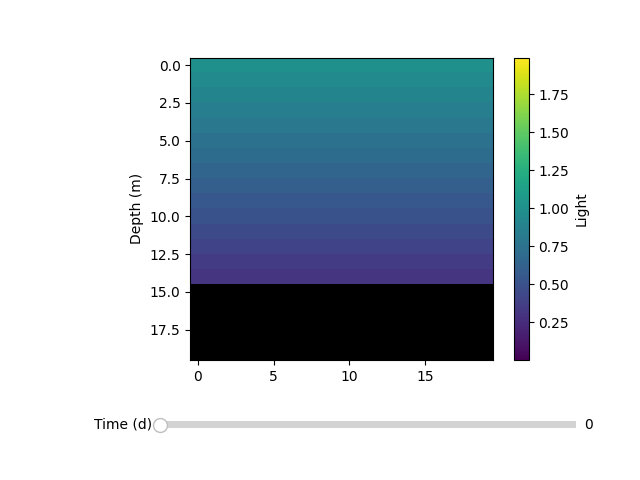

In [4]:
%matplotlib ipympl

plot = visu.cross_plot(light, t_0, t_f, dt)